# Explore Shelter Waitlist Data

In [1]:
import csv
import inflect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata

In [3]:
client = Socrata("data.sfgov.org", None)

# This string is the weird endpoint for this dataset?
results = client.get("w4sk-nq57", limit=2000)
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df[:25]
len(results_df.index)

1405

In [5]:
# Filter out the range values
df = results_df[~results_df['dob'].apply(lambda x: int(x[-4:])).isin([1895, 2019])]

def group_ages(x):
    year = int(x[-4:])
    #print(year)
    if year <= 1954:
        return '65+'
    if year <= 1964 and year >= 1955:
        return '55-64'
    if year <= 1974 and year >= 1965:
        return '45-54'
    if year <= 1984 and year >= 1975:
        return '35-44'
    if year >= 1985:
        return '18-35'

year_counts = df['dob'].apply(lambda x: group_ages(x)).value_counts().sort_index()
year_counts

18-35    266
35-44    309
45-54    314
55-64    355
65+      158
Name: dob, dtype: int64

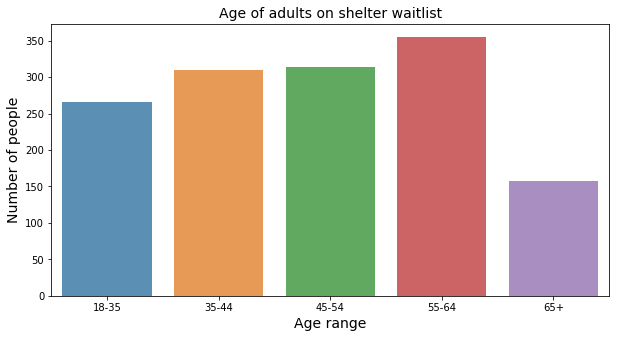

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(year_counts.index, year_counts.values, alpha=0.8)
plt.title('Age of adults on shelter waitlist', fontsize=14)
plt.ylabel('Number of people', fontsize=14)
plt.xlabel('Age range', fontsize=14)
plt.show()

In [7]:
num_seniors = year_counts['65+']

p = inflect.engine()
num_seniors = p.number_to_words(num_seniors).capitalize()

There are {{len(results_df.index)}} single adults on the waitlist for shelter tonight. **{{num_seniors}}** of them are senior citizens.

In [14]:
%pdb

Automatic pdb calling has been turned ON


In [15]:
1/0

ZeroDivisionError: division by zero

> <ipython-input-15-9e1622b385b6>(1)<module>()
----> 1 1/0

ipdb> dict()
{}
ipdb> dic()
*** NameError: name 'dic' is not defined
ipdb> dir()
['In', 'Out', 'Socrata', '_', '_10', '_12', '_6', '_7', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'client', 'csv', 'df', 'exit', 'get_ipython', 'group_ages', 'inflect', 'json', 'num_seniors', 'p', 'pd', 'plt', 'quit', 'results', 'results_df', 'sns', 'yapf_reformat', 'year_counts']
ipdb> n


In [ ]:
%